#### Importing Required Libraries

In [64]:
import numpy as np
import matplotlib.pyplot as plt

> Defining Function to get F and Z per iteration based on X.

In [53]:
def get_F(x):
    f = [0]*5
    f[0] = x[0]+x[1]+x[2]-13.5
    f[1] = 2*x[3]+4*x[0]+2*x[4]-227
    f[2] = x[4]+x[1]+2*x[2]-86.5
    f[3] = x[2]*x[3]/(x[1]*x[4])-0.929
    f[4] = ((12.2/100)**2)*x[1]*(x[4]**3)/(x[0]*x[4])-126.8

    return f

In [54]:
def get_Z(x):
    z = [[1, 1, 1, 0, 0],
         [4, 0, 0, 2, 2],
         [0, 1, 2, 0, 1],
         [0,
          -(x[2]*x[3]/(x[1]**2*x[4])), 
          x[3]/(x[1]*x[4]),
          x[2]/(x[1]*x[4]),
          -(x[2]*x[3]/(x[1]*x[4]**2))],
         [-(x[1]*x[3]**3/(x[0]*x[4]**2)*0.014884),
          x[3]**3/(x[0]*x[4])*0.014884,
          0,
          3*0.014884*x[1]*x[3]**2/(x[0]*x[4]),
          -(x[1]*x[3]**3/(x[0]*x[4]**2)*0.014884)]]
    
    return z

Initialize *X_0* as [29, 29, 29, 29, 29]() for initial step. Running the loop for 20 iterations based on the system of non-linear equations obtained. Plot shows convergence of each variable over 20 iterations.

iter 1 

X
 [29, 29, 29, 29, 29] 


Z
 [[1, 1, 1, 0, 0], [4, 0, 0, 2, 2], [0, 1, 2, 0, 1], [0, -0.034482758620689655, 0.034482758620689655, 0.034482758620689655, -0.034482758620689655], [-0.43163599999999996, 0.43163599999999996, 0, 1.2949080000000002, -0.43163599999999996]] 


Z_inv
 [[  0.43589744   0.11538462  -0.25641026   2.23076923  -0.23761712]
 [  0.48717949  -0.07692308  -0.05128205 -11.15384615   0.41582996]
 [  0.07692308  -0.03846154   0.30769231   8.92307692  -0.17821284]
 [ -0.23076923   0.11538462   0.07692308   2.23076923   0.53463852]
 [ -0.64102564   0.15384615   0.43589744  -6.69230769  -0.05940428]] 


F
 [73.5, 5, 29.5, 0.07099999999999995, -114.282556] 




iter 2 

X
 [-23.36515832  43.40377706  -6.53861874 104.05685622  56.17346042] 


Z
 [[1, 1, 1, 0, 0], [4, 0, 0, 2, 2], [0, 1, 2, 0, 1], [0, 0.006429400640308589, 0.04267878020380158, -0.0026818057180822944, 0.004967831248477901], [9.872524112543632, -12.777087158525763, 0, -15.988581511320598, 9.87252411254363

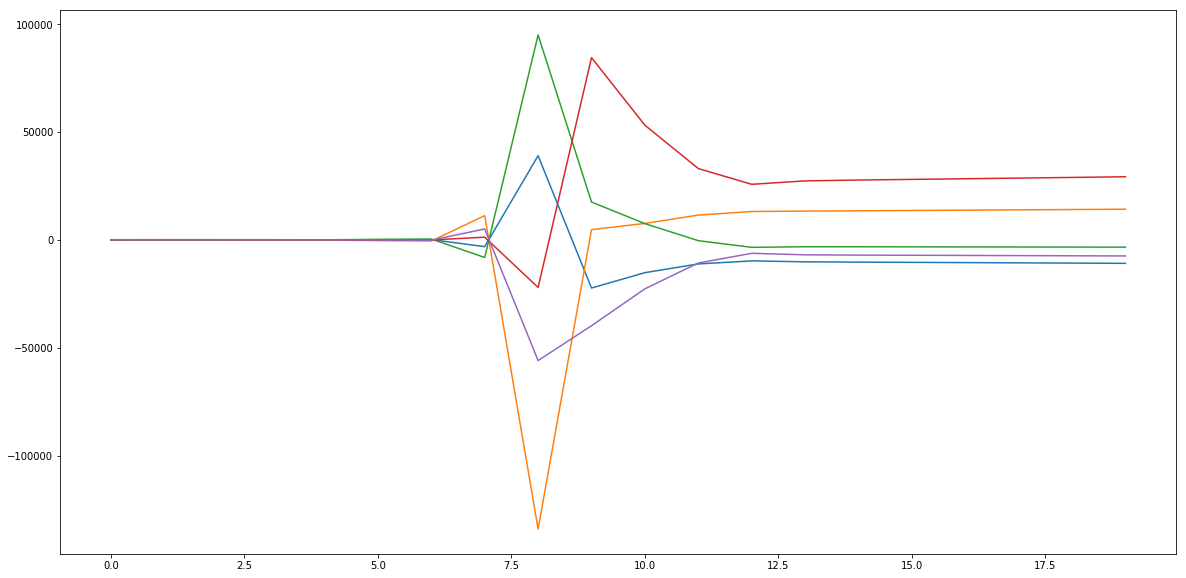

In [104]:
x = [29]*5
f = get_F(x)
z = get_Z(x)
c = []
iter = []

for i in range(20):
    
    z_inv = np.linalg.inv(z)
    iter.append(i)
    
    print("iter", i+1, "\n======== \n")
    print("X\n", x, "\n\n")
    print("Z\n", z, "\n\n")
    print("Z_inv\n", z_inv, "\n\n")
    print("F\n", f, "\n\n")
    print("========================================================\n\n")

    x_ = np.matmul(z_inv, ( np.negative(f) + np.matmul(z, x)))
    x = x_
    f = get_F(x_)
    z = get_Z(x_)
    c.append(x_)
    
print(len(iter), len(c[0]))
plt.figure(figsize=(20,10))
plt.plot(iter, [i[0] for i in c], [i[1] for i in c])
plt.plot(iter, [i[2] for i in c], [i[3] for i in c])
plt.plot(iter, [i[4] for i in c])
plt.show()